Group member: 
#### Ziqing Zhu, Gaoshuang Zhu, Zheng Li, Junfei Zheng. 

# Part 1 - Selection (30 points)
Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and
perform an initial exploration to determine which themes you wish to explore. Describe the questions you
want to be able to answer with the data, any concerns you have about the data, and any challenges you
expect to have to overcome.

In [1]:
!wget https://github.com/GSZHU/ISTM-6212/blob/master/Baton_Rouge_Crime_Incidents.csv.zip?raw=true

--2016-12-09 14:35:45--  https://github.com/GSZHU/ISTM-6212/blob/master/Baton_Rouge_Crime_Incidents.csv.zip?raw=true
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/GSZHU/ISTM-6212/raw/master/Baton_Rouge_Crime_Incidents.csv.zip [following]
--2016-12-09 14:35:45--  https://github.com/GSZHU/ISTM-6212/raw/master/Baton_Rouge_Crime_Incidents.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GSZHU/ISTM-6212/master/Baton_Rouge_Crime_Incidents.csv.zip [following]
--2016-12-09 14:35:45--  https://raw.githubusercontent.com/GSZHU/ISTM-6212/master/Baton_Rouge_Crime_Incidents.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|15

In [2]:
!unzip Baton_Rouge_Crime_Incidents.csv.zip?raw=true

Archive:  Baton_Rouge_Crime_Incidents.csv.zip?raw=true
  inflating: Baton_Rouge_Crime_Incidents.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._Baton_Rouge_Crime_Incidents.csv  


In [3]:
!mv Baton_Rouge_Crime_Incidents.csv crime.csv

In [1]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import requests
requests.packages.urllib3.disable_warnings()

In [2]:
btd = spark.read.csv("crime.csv")

#### Let we see the type of the btd

In [3]:
print(type(btd))

<class 'pyspark.sql.dataframe.DataFrame'>


#### Print out the schema


In [4]:
btd.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)



#### Let’s take a peek at the data. You can use the take operation of an RDD to get the first K records. Here, K = 3.

In [7]:
btd.take(3)

[Row(_c0=u'FILE NUMBER', _c1=u'OFFENSE DATE', _c2=u'OFFENSE TIME', _c3=u'CRIME', _c4=u'COMMITTED', _c5=u'OFFENSE', _c6=u'OFFENSE DESC', _c7=u'ADDRESS', _c8=u'ST NUMBER', _c9=u'ST DIR', _c10=u'ST NAME', _c11=u'ST TYPE', _c12=u'CITY', _c13=u'STATE', _c14=u'ZIP', _c15=u'DISTRICT', _c16=u'ZONE', _c17=u'SUBZONE', _c18=u'COMPLETE DISTRICT', _c19=u'GEOLOCATION'),
 Row(_c0=None, _c1=u'02/14/2014', _c2=None, _c3=u'JUVENILE', _c4=u'COMMITTED', _c5=u'14:81', _c6=u'IND BEHAVIOR W/JUV', _c7=None, _c8=None, _c9=None, _c10=None, _c11=None, _c12=None, _c13=None, _c14=None, _c15=u'1', _c16=u'C', _c17=u'3', _c18=u'1C3', _c19=None),
 Row(_c0=u'1600033277', _c1=u'04/03/2016', _c2=u'1850', _c3=u'OTHER', _c4=u'COMMITTED', _c5=u'14:103A(1)', _c6=u'DIST/PEACE/FISTIC ENCOUNTER', _c7=u'16426  VERMILLION DR', _c8=u'16426', _c9=None, _c10=u'VERMILLION', _c11=u'DR', _c12=u'BATON ROUGE', _c13=u'LA', _c14=u'70815', _c15=None, _c16=None, _c17=None, _c18=None, _c19=u'16426 VERMILLION DR\nBATON ROUGE, LA 70815\n(30.476

#### Let we count the sum of each type of crime to see which type most crime is most serious. 

In [6]:
Crimetype = btd.groupBy(btd['_c3']).count().toPandas().sort('count', ascending=False)
Crimetype

/Users/JeffZheng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



_c3  count
11                        OTHER  90449
6                         THEFT  59137
15                    NARCOTICS  28302
7                       BATTERY  27918
12  CRIMINAL DAMAGE TO PROPERTY  23125
13             VEHICLE BURGLARY  15589
8          RESIDENTIAL BURGLARY  12862
5                      NUISANCE   9137
4                       ASSAULT   8529
16                      FIREARM   8109
2      NON-RESIDENTIAL BURGLARY   8070
1            INDIVIDUAL ROBBERY   4751
18                     JUVENILE   3205
10                     HOMICIDE   2102
0                          VICE   1239
14               SEXUAL ASSAULT   1226
17             BUSINESS ROBBERY    718
3                          None      6
9                         CRIME      1

In [4]:
!wc -l crime.csv

907043 crime.csv


In [1]:
!csvstat crime.csv

  1. FILE NUMBER
	<class 'int'>
	Nulls: True
	Min: 1000000543
	Max: 2500032927
	Sum: 398133491136818
	Mean: 1326947980.205168
	Median: 1300074899
	Standard Deviation: 171119234.4555098
	Unique values: 203650
	5 most frequent values:
		1200126218:	76
		1400082626:	26
		1600070022:	25
		1300051176:	24
		1600090456:	22
  2. OFFENSE DATE
	<class 'datetime.date'>
	Nulls: False
	Min: 2011-01-01
	Max: 2016-12-01
	Unique values: 2162
	5 most frequent values:
		2011-03-25:	287
		2011-04-06:	267
		2011-07-01:	261
		2011-04-29:	256
		2011-05-06:	254
  3. OFFENSE TIME
	<class 'str'>
	Nulls: True
	Unique values: 1449
	5 most frequent values:
		1200:	5392
		0000:	4998
		2200:	4899
		1700:	4802
		2100:	4411
	Max length: 4
  4. CRIME
	<class 'str'>
	Nulls: False
	Unique values: 17
	5 most frequent values:
		OTHER:	90449
		THEFT:	59137
		NARCOTICS:	28302
		BATTERY:	27918
		CRIMINAL DAMAGE TO PROPERTY:	23125
	Max length: 27
  5. COMMITTED
	<class 'str'>
	Nulls: False
	Values: COMMITTED, ATTEMPTED
  6. O

In [5]:
!csvcut -n crime.csv

  1: FILE NUMBER
  2: OFFENSE DATE
  3: OFFENSE TIME
  4: CRIME
  5: COMMITTED
  6: OFFENSE
  7: OFFENSE DESC
  8: ADDRESS
  9: ST NUMBER
 10: ST DIR
 11: ST NAME
 12: ST TYPE
 13: CITY
 14: STATE
 15: ZIP
 16: DISTRICT
 17: ZONE
 18: SUBZONE
 19: COMPLETE DISTRICT
 20: GEOLOCATION


FILE NUMBER: The police report number

OFFENSE DATE: The date of the offense occurred

OFFENSE TIME: The specific offense time

CRIME: The crime type general category

COMMITTED: Indication of whether the crime was attempted or committed

OFFENSE: Louisiana Revised Statues (LRS) code of the crime

OFFENSE DESC: Description of the crime

ADDRESS: Formatted crime street address

ST NUMBER: Street number where the crime occurred

ST DIR: Street direction where the crime occurred

ST NAME: Street name where the crime occurred

ST TYPE: Street type where the crime occurred

CITY: The city of the crime occurred

STATE: The state of the crime occurred

ZIP: The ZIP code of the crime occurred

DISTRICT: Police geographical District number where the crime occurred

ZONE: Police geographical Zone within a District where the crime occurred

SUBZONE: Police geographical Subzone number within a Zone where the crime occurred

COMPLETE DISTRICT: Shows concatenated District, Zone and Subzone

GEOLOCATION: Full crime street address for geocoding


We first looked over different data sets from ‘us-city.census.okfn.org’. Then we decided to use the Baton Rouge crime data to do our analysis. The direct data web address is https://data.brla.gov/Public-Safety/Baton-Rouge-Crime-Incidents/fabb-cnnu/data. 

This data set contains information about crimes reported in Baton Rouge which handled by the Baton Rouge Police Department. Crimes include Burglaries (Vehicle, Residential and Non-residential), Robberies (Individual and Business), Theft, Narcotics, Vice Crimes, Assault, Nuisance, Battery, Firearm, Homicides, Criminal Damage to Property, Sexual Assaults and Juvenile. In order to protect the privacy of sexual assault victims and juvenile victims, these incidents are not geocoded and will not be mapped. 

Null values: FILE NUMBER, OFFENSE TIME, ADDRESS, ST NUMBER, ST DIR, ST NAME, ST TYPE, CITY, STATE, ZIP, DISTRICT, ZONE, SUBZONE, COMPLETE DISTRICT, GEOLOCATION, 

In total, we have 20 columns and 304468 rows. Among the 20 columns, 15 columns have null values. 



# Challenge 
In order to get a proper and clear analysis of the crime distribution, we have to limit the number of crimes to demonstrate on our graphs. Therefore, one of our challenges in this project was to categorize the 17 crimes. We need to fully understand all the similarities and differences between all crimes before make the categorization. 
Another challenge that we had is to drop unnecessary columns from our initial data set. Since we know that all of the crime incidents were happened in Baton Rouge of Louisiana, we dropped the City and State column from the very beginning of our analysis process. We also found that a single file number could have different crimes, date and offense combinations, therefore we dropped this column as well. However, to make our results more meaningful, we still need to consider dropping other columns during our analysis process.

# Explore Orientation 
Our objective of the analysis could be summarized into 4 questions:
1. How the total crimes change with time? 
2. How different crime categories vary with different months in a year?
3. Which time period is most likely to have crime committed? 
4. Which district has the most crimes happening (and which crime happens most, and which sub-district has it most)?

# Part 2 - Wrangling (35 points)
Based on what you found above, wrangle the data into a format suitable for analysis. This may involve
cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your
process as you proceed, and document any scripts, databases, or other models you develop. Be specific about
any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make
about the meaning of variables and their values.
Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional
model, ensure that the fact table contains the right number of records).

In [4]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [5]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [6]:
!createdb -U dbuser project03

In [7]:
%sql postgresql://dbuser@localhost:5432/project03

'Connected: dbuser@project03'

In [8]:
%%sql
DROP TABLE IF EXISTS crime;
CREATE TABLE crime
(
 file_number VARCHAR(255),
 offense_date DATE,
 offense_time  TEXT,
 crime  VARCHAR(80),
 committed TEXT,
 offense VARCHAR(80),
 offense_desc  VARCHAR(255),
 address VARCHAR(255), 
 st_number INTEGER,
 st_dir TEXT,
 st_name TEXT,
 st_type TEXT,
 city TEXT,
 state TEXT,
 zip VARCHAR(80),
 district VARCHAR(5),
 zone TEXT,
 subzone VARCHAR(4),
 complete_district VARCHAR(4),
 geolocation VARCHAR(100)
);

Done.
Done.


[]

In [9]:
%%sql
COPY crime FROM '/home/jovyan/work/crime.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

304468 rows affected.


[]

In [10]:
%%sql
DROP TABLE IF EXISTS crimebr;
CREATE TABLE crimebr AS 
(SELECT 
    *,
    row_number() OVER (PARTITION BY geolocation order by offense_date, offense_time, offense) AS geolocation_num
  FROM crime 
  WHERE geolocation is not null);

Done.
302537 rows affected.


[]

In [11]:
%%sql
UPDATE crimebr SET file_number = 'NA' WHERE file_number is NULL;
UPDATE crimebr SET offense_time = 'NA' WHERE offense_time is NULL;
UPDATE crimebr SET address = 'NA' WHERE address is NULL;
UPDATE crimebr SET st_number = '-1000' WHERE st_number is NULL;
UPDATE crimebr SET st_dir = 'NA' WHERE st_dir is NULL;
UPDATE crimebr SET st_name = 'NA' WHERE st_name is NULL;
UPDATE crimebr SET st_type = 'NA' WHERE st_type is NULL;
UPDATE crimebr SET city = 'NA' WHERE city is NULL;
UPDATE crimebr SET state = 'NA' WHERE state is NULL;
UPDATE crimebr SET zip = 'NA' WHERE zip is NULL;
UPDATE crimebr SET district = 'NA' WHERE district is NULL;
UPDATE crimebr SET zone = 'NA' WHERE ZONE is NULL;
UPDATE crimebr SET subzone = 'NA' WHERE subzone is NULL;
UPDATE crimebr SET complete_district = 'NA' WHERE complete_district is NULL;

2500 rows affected.
2500 rows affected.
2500 rows affected.
2959 rows affected.
252044 rows affected.
2500 rows affected.
13804 rows affected.
2500 rows affected.
2500 rows affected.
136081 rows affected.
15627 rows affected.
15627 rows affected.
15627 rows affected.
15627 rows affected.


[]

In [12]:
%%sql
ALTER TABLE crimebr
ADD COLUMN year INTEGER,
ADD COLUMN month INTEGER,
ADD COLUMN day INTEGER,
ADD COLUMN hour_24 TEXT,
ADD COLUMN quarter INTEGER
;

Done.


[]

In [13]:
%%sql
UPDATE crimebr 
SET (year, month, day, hour_24, quarter)
 =( CAST(TO_CHAR(offense_date, 'YYYY') AS INTEGER),
    CAST(TO_CHAR(offense_date, 'MM') AS INTEGER),
    CAST(TO_CHAR(offense_date, 'DD') AS INTEGER),
    SUBSTRING(offense_time, 1,2),
    CAST(TO_CHAR(offense_date, 'Q') AS INTEGER));
    

302537 rows affected.


[]

In [14]:
%%sql
ALTER TABLE crimebr
ADD crime_type TEXT;

Done.


[]

#### We divided the crime type into five groups 

In [15]:
%%sql 
UPDATE crimebr 
SET crime_type=( SELECT CASE WHEN crime in ('OTHER','JUVENILE','VICE','NARCOTICS') THEN 'Other' 
                WHEN crime in ('FIREARM','CRIMINAL DAMAGE TO PROPERTY') THEN 'Property' 
                WHEN crime in ('THEFT','INDIVIDUAL ROBBERY','HOMICIDE') THEN 'Personal' 
                WHEN crime in ('SEXUAL ASSAULT','ASSAULT','BATTERY','NUISANCE') THEN 'Assault'
                WHEN crime in ('RESIDENTIAL BURGLARY','VEHICLE BURGLARY','NON-RESIDENTIAL BURGLARY','BUSINESS ROBBERY') THEN 'Burglary'
                END);

302537 rows affected.


[]

In [16]:
%%sql
SELECT * FROM crimebr
ORDER BY crime_type
LIMIT 5;

5 rows affected.


[('1300042587', datetime.date(2013, 5, 19), '1740', 'ASSAULT', 'COMMITTED', '13:37', 'ASSAULT/AGG/CC', '100 E BUCHANAN ST', 100, 'E', 'BUCHANAN', 'ST', 'BATON ROUGE', 'LA', '70802', '2', 'D', '1', '2D1', '100 E BUCHANAN ST\nBATON ROUGE, LA 70802\n(30.424951, -91.179661)', 1, 2013, 5, 19, '17', 2, 'Assault'),
 ('1200101568', datetime.date(2012, 9, 26), '1731', 'BATTERY', 'COMMITTED', '13:35.3', 'DOMESTIC ABUSE BATTERY/CC', '1 W LAKESHORE DR', 1, 'W', 'LAKESHORE', 'DR', 'BATON ROUGE', 'LA', 'NA', '2', 'D', '2', '2D2', '1 W LAKESHORE DR\nBATON ROUGE, LA\n', 1, 2012, 9, 26, '17', 3, 'Assault'),
 ('1100016205', datetime.date(2011, 2, 18), '1008', 'NUISANCE', 'COMMITTED', '12:500', 'ABAND/INOPERATIVE VEHICLE/CC', '100 E AIRPORT DR', 100, 'E', 'AIRPORT', 'DR', 'BATON ROUGE', 'LA', 'NA', '3', 'G', '1', '3G1', '100 E AIRPORT DR\nBATON ROUGE, LA\n', 1, 2011, 2, 18, '10', 1, 'Assault'),
 ('1600044539', datetime.date(2016, 5, 5), '0010', 'NUISANCE', 'COMMITTED', '13:63.3', 'ENT/REM AFTER FORB/CC', '100 E JOHNSON ST', 100, 'E', 'JOHNSON', 'ST', 'BATON ROUGE', 'LA', '70802', '2', 'D', '1', '2D1', '100 E JOHNSON ST\nBATON ROUGE, LA 70802\n(30.424472, -91.179439)', 2, 2016, 5, 5, '00', 2, 'Assault'),
 ('1200015825', datetime.date(2012, 2, 14), '2200', 'NUISANCE', 'COMMITTED', '12:101.3', 'LOUD MUSIC FROM VEHICLE', '100 E GARFIELD ST', 100, 'E', 'GARFIELD', 'ST', 'BATON ROUGE', 'LA', '70802', '2', 'D', '1', '2D1', '100 E GARFIELD ST\nBATON ROUGE, LA 70802\n(30.422449, -91.178505)', 1, 2012, 2, 14, '22', 1, 'Assault')]

## Star Schema

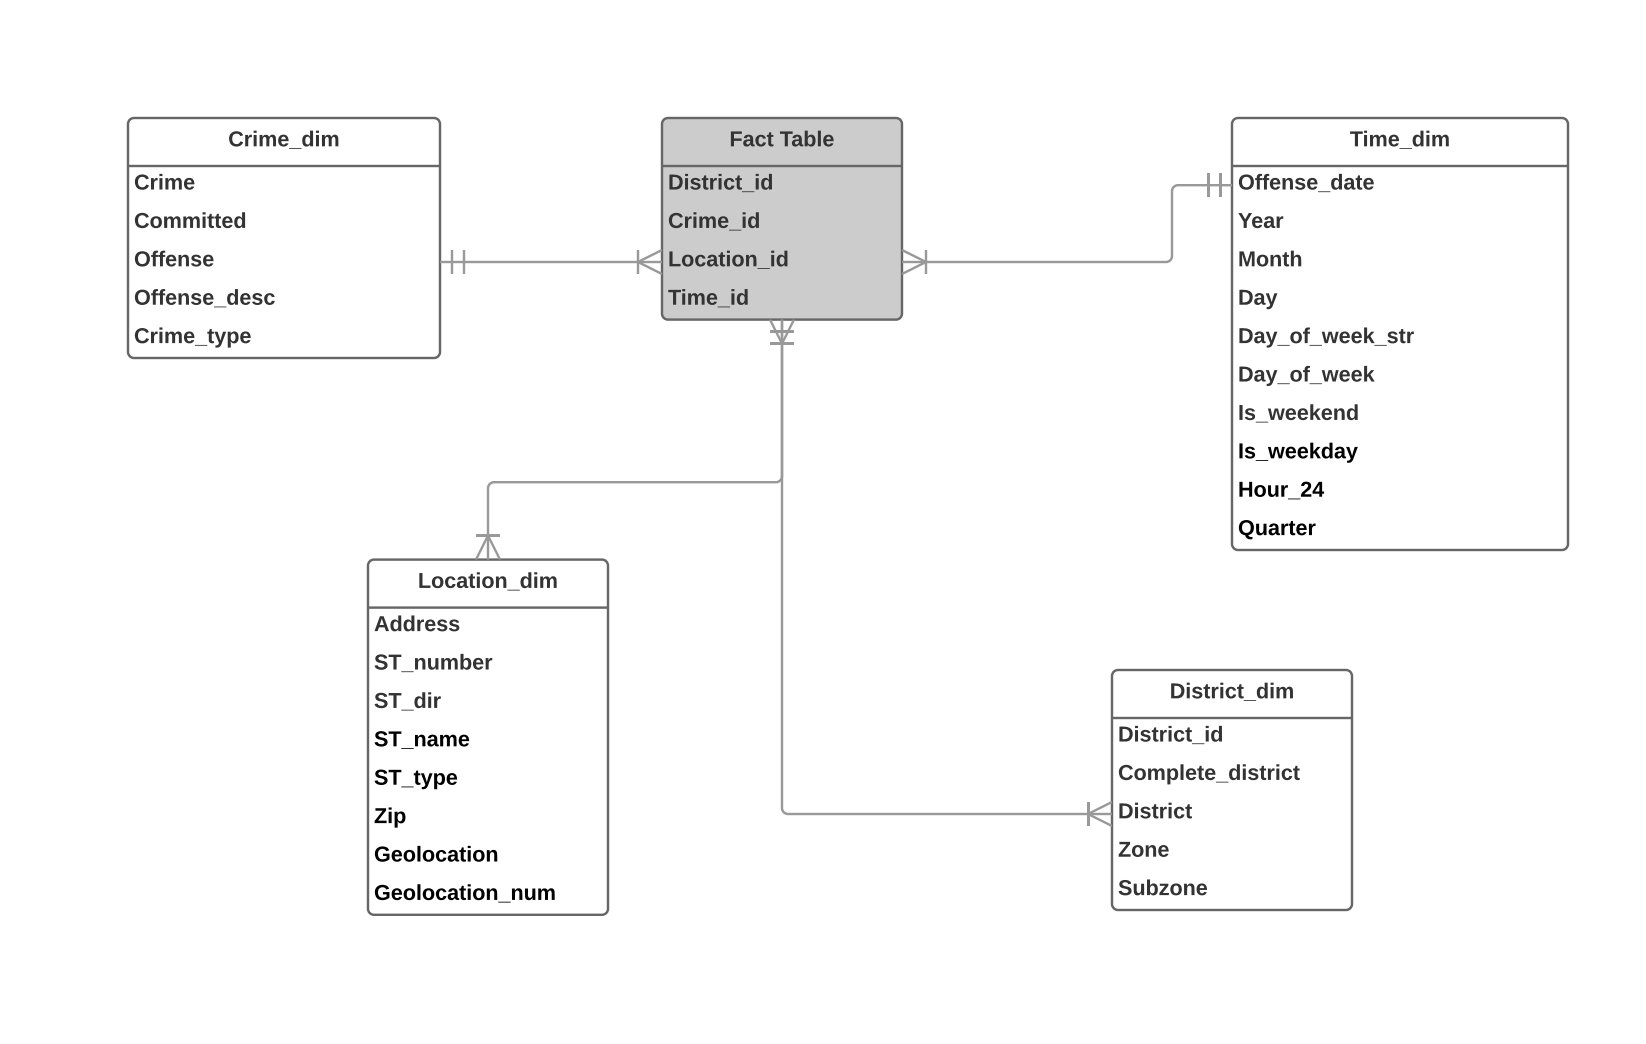

In [8]:
from IPython.display import Image
Image('Starschema.png')

In [19]:
%%sql
SELECT count(distinct address), 'address' as attribute from crimebr

UNION ALL

select count(*), ' address | st_number | st_dir | st_name |st_type' as attribute from 
(
select address, st_number, st_dir, st_name, st_type
from crimebr
group by  address,st_number, st_dir, st_name, st_type
)a;

2 rows affected.


[(58162, 'address'),
 (58249, ' address | st_number | st_dir | st_name |st_type')]

### Create the loaction dimension table 

In [30]:
%%sql
DROP TABLE IF EXISTS location_dim;
CREATE TABLE location_dim (
  location_id SERIAL PRIMARY KEY,
  address VARCHAR(255) DEFAULT NULL,
  st_number INTEGER DEFAULT NULL,
  st_dir TEXT DEFAULT NULL,
  st_name TEXT DEFAULT NULL,
  st_type TEXT DEFAULT NULL,
  zip VARCHAR(80) DEFAULT NULL,
  geolocation varchar(100) DEFAULT NULL,
  geolocation_num varchar(8)
);

Done.
Done.


[]

### Insert value into the location dimension table 

In [31]:
%%sql
INSERT INTO location_dim 
(address, st_number, st_dir, st_name, st_type, zip, geolocation,geolocation_num)
SELECT distinct address, st_number, st_dir, st_name, st_type, zip, geolocation,geolocation_num 
from crimebr;

302537 rows affected.


[]

In [22]:
%%sql
SELECT * FROM location_dim
ORDER BY geolocation, geolocation_num
LIMIT 5;

5 rows affected.


[(4, '1  DAIRYMPLE DR', 1, 'NA', 'DAIRYMPLE', 'DR', '70802', '1 DAIRYMPLE DR\nBATON ROUGE, LA 70802\n', '1'),
 (5, '1  DAIRYMPLE ST', 1, 'NA', 'DAIRYMPLE', 'ST', '70802', '1 DAIRYMPLE ST\nBATON ROUGE, LA 70802\n', '1'),
 (22, '1  DALRYMPLE', 1, 'NA', 'DALRYMPLE', 'NA', 'NA', '1 DALRYMPLE\nBATON ROUGE, LA\n(30.415757, -91.175315)', '1'),
 (23, '1  DALRYMPLE', 1, 'NA', 'DALRYMPLE', 'NA', 'NA', '1 DALRYMPLE\nBATON ROUGE, LA\n(30.415757, -91.175315)', '2'),
 (24, '1  DALRYMPLE', 1, 'NA', 'DALRYMPLE', 'NA', 'NA', '1 DALRYMPLE\nBATON ROUGE, LA\n(30.415757, -91.175315)', '3')]

In [23]:
%%sql
select count(*), 'district' as attribute from 
(
select complete_district
from crimebr
group by complete_district
)a

UNION ALL

select count(*), 'complete district | district | zone | subzone' as attribute from 
(
select complete_district, district, zone, subzone
from crimebr
group by complete_district, district, zone, subzone
)b
;

2 rows affected.


[(78, 'district'), (78, 'complete district | district | zone | subzone')]

### Create the district dimension table 

In [32]:
%%sql
DROP TABLE IF EXISTS district_dim;
CREATE TABLE district_dim (
  district_id SERIAL PRIMARY KEY,
  complete_district VARCHAR(5) DEFAULT NULL,
  district VARCHAR(5) DEFAULT NULL,
  zone TEXT DEFAULT NULL,
  subzone VARCHAR(4) DEFAULT NULL
);

Done.
Done.


[]

### Insert the value into the district dimension table 

In [33]:
%%sql
INSERT INTO district_dim 
(complete_district, district, zone, subzone)
SELECT DISTINCT complete_district, district, zone, subzone 
from crimebr;

78 rows affected.


[]

In [26]:
%%sql
SELECT * FROM district_dim
LIMIT 10;

10 rows affected.


[(1, '3F2', '3', 'F', '2'),
 (2, 'OTH', 'O', 'T', 'H'),
 (3, '2E5', '2', 'E', '5'),
 (4, '2A1', '2', 'A', '1'),
 (5, '2A4', '2', 'A', '4'),
 (6, '1A1', '1', 'A', '1'),
 (7, '1C1', '1', 'C', '1'),
 (8, '3C3', '3', 'C', '3'),
 (9, '2F1', '2', 'F', '1'),
 (10, '2C3', '2', 'C', '3')]

In [25]:
%%sql
SELECT count(DISTINCT crime), 'crime' as attribute from crimebr

UNION ALL

select count(*), ' crime | committed | offense | offense_desc' as attribute from 
(
select crime, committed, offense, offense_desc
from crimebr
group by crime, committed, offense, offense_desc
)a
;

2 rows affected.


[(17, 'crime'), (1069, ' crime | committed | offense | offense_desc')]

### Create the crime dimension table 

In [34]:
%%sql
DROP TABLE IF EXISTS crime_dim;
CREATE TABLE crime_dim (
  crime_id SERIAL PRIMARY KEY,
  crime  VARCHAR(80) DEFAULT NULL,
  committed TEXT DEFAULT NULL,
  offense VARCHAR(80) DEFAULT NULL,
  offense_desc  VARCHAR(255) DEFAULT NULL,
  crime_type TEXT
);

Done.
Done.


[]

### Insert value into the crime dimension table 

In [35]:
%%sql
INSERT INTO crime_dim 
(crime, committed, offense, offense_desc,crime_type)
SELECT DISTINCT crime, committed, offense, offense_desc, crime_type
from crimebr;

1069 rows affected.


[]

In [29]:
%%sql
SELECT * FROM crime_dim
LIMIT 10;

10 rows affected.


[(1, 'ASSAULT', 'ATTEMPTED', '13:37', 'ASSAULT/AGG/CC'),
 (2, 'ASSAULT', 'ATTEMPTED', '13:38', 'ASSAULT/SIMPLE/CC'),
 (3, 'ASSAULT', 'ATTEMPTED', '14:37', 'ASSAULT/AGG'),
 (4, 'ASSAULT', 'ATTEMPTED', '14:37.1', 'ASSAULT/DRIVE-BY SHOOTING'),
 (5, 'ASSAULT', 'ATTEMPTED', '14:37.4/A', 'ASSAULT/ AGG FIREARM'),
 (6, 'ASSAULT', 'ATTEMPTED', '14:37/B', 'ASSAULT/ AGG KNIFE CUTTING INST'),
 (7, 'ASSAULT', 'ATTEMPTED', '14:37/C', 'ASSAULT/ AGG ODW'),
 (8, 'ASSAULT', 'ATTEMPTED', '14:37C', 'ASSAULT/AGG ODW'),
 (9, 'ASSAULT', 'ATTEMPTED', '14:38', 'ASSAULT/SIMPLE'),
 (10, 'ASSAULT', 'COMMITTED', '13:37', 'ASSAULT/AGG/CC')]

In [24]:
%%sql
SELECT TO_CHAR(offense_date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(offense_date, 'YYYY') AS year,
    TO_CHAR(offense_date, 'MM') AS month,
    TO_CHAR(offense_date, 'DD') AS day,
    TO_CHAR(offense_date, 'Day') AS day_of_week_str,
    TO_CHAR(offense_date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(offense_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(offense_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday,
    SUBSTRING(offense_time, 1,2) AS hour_24,
    TO_CHAR(offense_date, 'Q') AS quarter
FROM crimebr
LIMIT 10;

10 rows affected.


[('2013-09-07', '2013', '09', '07', 'Saturday ', '7', 1, 0, '13', '3'),
 ('2011-05-08', '2011', '05', '08', 'Sunday   ', '1', 0, 1, '15', '2'),
 ('2012-09-26', '2012', '09', '26', 'Wednesday', '4', 0, 1, '17', '3'),
 ('2016-09-17', '2016', '09', '17', 'Saturday ', '7', 1, 0, '15', '3'),
 ('2016-09-17', '2016', '09', '17', 'Saturday ', '7', 1, 0, '15', '3'),
 ('2015-09-17', '2015', '09', '17', 'Thursday ', '5', 0, 1, '22', '3'),
 ('2015-09-17', '2015', '09', '17', 'Thursday ', '5', 0, 1, '22', '3'),
 ('2011-04-01', '2011', '04', '01', 'Friday   ', '6', 1, 0, '01', '2'),
 ('2011-02-18', '2011', '02', '18', 'Friday   ', '6', 1, 0, '10', '1'),
 ('2011-03-04', '2011', '03', '04', 'Friday   ', '6', 1, 0, '02', '1')]

### Create the time dimension table 

In [36]:
%%sql
DROP TABLE IF EXISTS time_dim;
CREATE TABLE time_dim (
    time_id SERIAL PRIMARY KEY,
    offense_date DATE,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_24 TEXT,
    quarter INTEGER
);

Done.
Done.


[]

### Insert the value into the time dimension table 

In [37]:
%%sql
INSERT INTO time_dim (offense_date, year, month, day, day_of_week_str, day_of_week,
                  is_weekend, is_weekday, hour_24, quarter)
SELECT DISTINCT offense_date AS offense_date, 
    CAST(TO_CHAR(offense_date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(offense_date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(offense_date, 'DD') AS INTEGER) AS day,
    TO_CHAR(offense_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(offense_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(offense_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(offense_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    SUBSTRING(offense_time, 1,2) AS hour_24,
    CAST(TO_CHAR(offense_date, 'Q') AS INTEGER) AS quarter
FROM crimebr;

49578 rows affected.


[]

In [33]:
%%sql
SELECT * FROM time_dim
LIMIT 10;

10 rows affected.


[(1, datetime.date(2012, 8, 27), 2012, 8, 27, 'Monday   ', 2, False, True, '01', 3),
 (2, datetime.date(2011, 1, 30), 2011, 1, 30, 'Sunday   ', 1, True, False, '23', 1),
 (3, datetime.date(2016, 2, 1), 2016, 2, 1, 'Monday   ', 2, False, True, '18', 1),
 (4, datetime.date(2014, 6, 1), 2014, 6, 1, 'Sunday   ', 1, True, False, '06', 2),
 (5, datetime.date(2015, 7, 28), 2015, 7, 28, 'Tuesday  ', 3, False, True, '12', 3),
 (6, datetime.date(2014, 12, 6), 2014, 12, 6, 'Saturday ', 7, True, False, '00', 4),
 (7, datetime.date(2011, 5, 18), 2011, 5, 18, 'Wednesday', 4, False, True, '06', 2),
 (8, datetime.date(2011, 9, 6), 2011, 9, 6, 'Tuesday  ', 3, False, True, '19', 3),
 (9, datetime.date(2016, 10, 10), 2016, 10, 10, 'Monday   ', 2, False, True, '19', 4),
 (10, datetime.date(2013, 8, 18), 2013, 8, 18, 'Sunday   ', 1, True, False, '11', 3)]

### Create the Fact table 

In [38]:
%%sql
DROP TABLE IF EXISTS crimebr_fact;
CREATE TABLE crimebr_fact (
  district_id INTEGER, 
  crime_id INTEGER, 
  location_id INTEGER,
  time_id INTEGER
);

Done.
Done.


[]

### Insert the location_id from the location_dim into the fact table 

In [39]:
%%sql
INSERT INTO crimebr_fact (location_id)
SELECT location_id from location_dim;

302537 rows affected.


[]

### Update the crime_id from the crime_dim into the fact table 

In [40]:
%%sql
UPDATE 
  crimebr_fact a 
SET 
  crime_id = b.crime_id 
FROM 
  crime_dim b 
  INNER JOIN crimebr c ON b.crime = c.crime
                          AND b.offense = c.offense
                          AND b.offense_desc = c.offense_desc
  INNER JOIN location_dim d ON c.geolocation = d.geolocation 
                             AND c.address = d.address
                             AND c.st_name = d.st_name
                             AND c.st_dir = d.st_dir
                             AND c.st_type = d.st_type
                             AND c.zip = d.zip
WHERE 
  a.location_id = d.location_id;

302537 rows affected.


[]

### Update the district_id from the district_dim into the fact table 

In [41]:
%%sql
UPDATE 
  crimebr_fact a  
SET 
  district_id = b.district_id 
FROM 
  district_dim b 
  INNER JOIN crimebr c ON b.complete_district = c.complete_district 
                             AND b.district = c.district 
                             AND b.zone = c.zone 
                             AND b.subzone = c.subzone 
  INNER JOIN location_dim d ON c.address = d.address 
                            AND c.st_number = d.st_number
                            AND c.st_dir = d.st_dir
                            AND c.st_name = d.st_name
                            AND c.st_type = d.st_type
                            AND c.zip = d.zip
                            AND c.geolocation = d.geolocation

WHERE 
  a.location_id = d.location_id;

302537 rows affected.


[]

### Update the time_id from the time_dim into the fact table 

In [42]:
%%sql
UPDATE 
  crimebr_fact a  
SET 
  time_id = b.time_id 
FROM 
  time_dim b 
  INNER JOIN crimebr c ON b.offense_date = c.offense_date
                          AND b.year = c.year
                          AND b.month = c.month
                          AND b.day = c.day
                          AND b.hour_24 = c.hour_24
                          AND b.quarter = c.quarter
  INNER JOIN location_dim d ON c.address = d.address 
                            AND c.st_number = d.st_number
                            AND c.st_dir = d.st_dir
                            AND c.st_name = d.st_name
                            AND c.st_type = d.st_type
                            AND c.zip = d.zip
                            AND c.geolocation = d.geolocation

WHERE 
  a.location_id = d.location_id;

302537 rows affected.


[]

In [43]:
%%sql
SELECT * FROM crimebr_fact
limit 5; 

5 rows affected.


[(35, 640, 54520, 41854),
 (35, 1013, 55821, 9907),
 (73, 883, 56019, 37549),
 (37, 995, 56935, 620),
 (44, 816, 57052, 33325)]

# Part 3 - Analysis (35 points)
Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1
with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover,
discussing them and whether the results match your expectations. Include charts or other visuals that support
your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but
be sure to export images and to include them properly in your writeup.

### Trend of number of crimes 
We would like to analyze the trend of number of crimes in different years. We use ROLL UP to find the number of crimes from 2011 to 2016.

In [44]:
%%sql
SELECT time_dim.year, count(*) AS count 
FROM time_dim,crimebr_fact 
WHERE time_dim.time_id = crimebr_fact.time_id 
GROUP BY ROLLUP(time_dim.year);

7 rows affected.


[(2011, 58497),
 (2012, 57675),
 (2013, 40103),
 (2014, 69602),
 (2015, 50610),
 (2016, 26050),
 (None, 302537)]

In [45]:
import psycopg2
import pandas as pd
conn = psycopg2.connect("dbname='project03' user='dbuser' host='localhost'")
c = conn.cursor()

c.execute("SELECT time_dim.year, count(*) AS count FROM time_dim,crimebr_fact WHERE time_dim.time_id = crimebr_fact.time_id GROUP BY ROLLUP(time_dim.year);")
rows = c.fetchall()

annualflow = []
for r in rows:
    annualflow.append(r[1])
annualflow.pop()   


df1 = pd.DataFrame(annualflow,index=['2011','2012','2013','2014','2015','2016'])
df1.columns=['annualflow']
print(df1)

conn.commit()

      annualflow
2011       58497
2012       57675
2013       40103
2014       69602
2015       50610
2016       26050


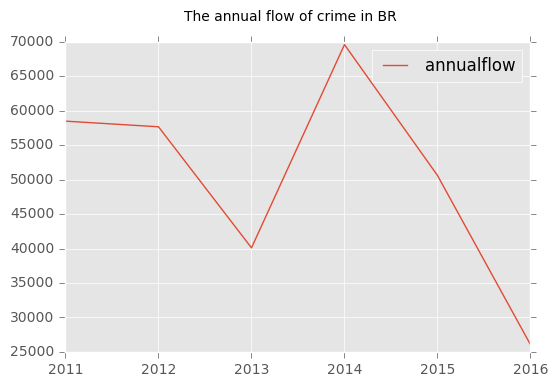

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

df1.plot()
plt.suptitle('The annual flow of crime in BR')

From the plot, we could see that the crime number decreases greatly from 2015 to 2016. So, we will use ROLLUP to analyze which type of crime causes the decrese of crime numbers. 

In [14]:
%%sql
SELECT time_dim.year, crime_dim.crime_type, count(*) AS count 
FROM time_dim,crimebr_fact,crime_dim
WHERE time_dim.time_id = crimebr_fact.time_id AND crime_dim.crime_id = crimebr_fact.crime_id 
GROUP BY ROLLUP(time_dim.year,crime_dim.crime_type);

37 rows affected.


[(2011, 'Assault', 9303),
 (2011, 'Burglary', 7963),
 (2011, 'Other', 24251),
 (2011, 'Personal', 11782),
 (2011, 'Property', 5197),
 (2011, None, 58496),
 (2012, 'Assault', 9792),
 (2012, 'Burglary', 7584),
 (2012, 'Other', 21734),
 (2012, 'Personal', 13035),
 (2012, 'Property', 5531),
 (2012, None, 57676),
 (2013, 'Assault', 6397),
 (2013, 'Burglary', 5394),
 (2013, 'Other', 15902),
 (2013, 'Personal', 8241),
 (2013, 'Property', 4169),
 (2013, None, 40103),
 (2014, 'Assault', 13417),
 (2014, 'Burglary', 6731),
 (2014, 'Other', 26583),
 (2014, 'Personal', 16708),
 (2014, 'Property', 6163),
 (2014, None, 69602),
 (2015, 'Assault', 8450),
 (2015, 'Burglary', 5487),
 (2015, 'Other', 21390),
 (2015, 'Personal', 10548),
 (2015, 'Property', 4735),
 (2015, None, 50610),
 (2016, 'Assault', 4082),
 (2016, 'Burglary', 3638),
 (2016, 'Other', 9410),
 (2016, 'Personal', 5674),
 (2016, 'Property', 3246),
 (2016, None, 26050),
 (None, None, 302537)]

In [ ]:
import psycopg2
import pandas as pd
conn = psycopg2.connect("dbname='project03' user='dbuser' host='localhost'")
c = conn.cursor()

c.execute("SELECT time_dim.year, crime_dim.crime_type, count(*) AS count FROM time_dim,crimebr_fact,crime_dim WHERE time_dim.time_id = crimebr_fact.time_id AND crime_dim.crime_id = crimebr_fact.crime_id GROUP BY ROLLUP(time_dim.year,crime_dim.crime_type);")
rows = c.fetchall()

list = []
for r in rows:
    list.append(r[2])
list.pop()   

assult=[9130,9625,6336,13739,8441,4079]
burglary=[7719,8156,5405,7002,5443,3647]
other=[24731,21437,15806,25714,21384,9399]
personal=[11719,13014,8293,17058,10506,5633]
property=[5198,5443,4263,6089,4836,3275]


df2 = pd.DataFrame(assult,index=['2011','2012','2013','2014','2015','2016'])
df3 = pd.DataFrame(burglary,index=['2011','2012','2013','2014','2015','2016'])
df4 = pd.DataFrame(other,index=['2011','2012','2013','2014','2015','2016'])
df5 = pd.DataFrame(personal,index=['2011','2012','2013','2014','2015','2016'])
df6 = pd.DataFrame(property,index=['2011','2012','2013','2014','2015','2016'])

df2.columns=['assult']
df3.columns=['burglary']
df4.columns=['other']
df5.columns=['personal']
df6.columns=['property']
conn.commit()

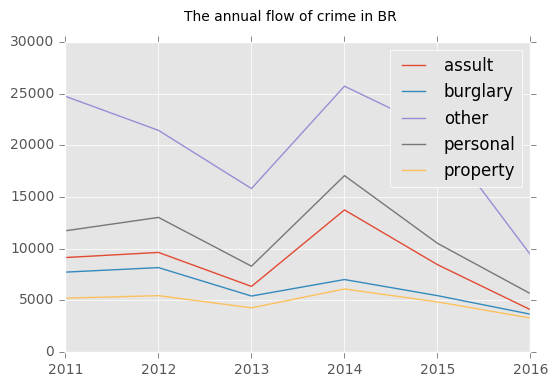

In [17]:
plt.style.use('ggplot') 

ax=df2.plot()
df3.plot(ax=ax)
df4.plot(ax=ax)
df5.plot(ax=ax)
df6.plot(ax=ax)
plt.suptitle('The annual flow of crime type in BR')

From this plot, we could the trend of number of diverse crime types is similar to that of number of total number of crimes. And from 2015 to 2016, number of all crime types decrese greatly.

## Monthly crime data 

In [ ]:
%%sql
select count(*), crime_type, month
from crimebr
group by crime_type, month
order by crime_type, month
;

In [3]:
from bokeh.charts import Area, show, output_file, defaults
from bokeh.layouts import row

defaults.width = 600
defaults.height = 500

# create some example data
data = dict(
    Property =[2538,2182,2766,2853,3011,2888,2873,2505,2572,2685,2427,1979],
    Personal =[5653,4647,5455,5787,5941,5905,5870,5846,5421,5658,5168,4639],
    Assault =[3840,3470,4320,4453,4493,4065,4032,3856,3748,3917,3338,2872],
    Burglary =[3132,2261,2831,3190,3302,3374,3506,3465,3138,3235,3064,2741],
    Other =[10656,10301,12082,10542,11399,10406,10180,10225,10141,9445,8976,7317]
)
area1 = Area(data, title="Area Chart", legend="top_right",
             xlabel='month', ylabel='Crime number')

area2 = Area(data, title="Stacked Area Chart", legend="top_right",
             stack=True, xlabel='month', ylabel='Crime number')

output_file("area.html", title="area.py example")

show(row(area1, area2))

#### You may not be able to run this code in datanotebook to see the diagram, but on the local juoyter notebook it will be fine. Therefore we attach the diagram below.

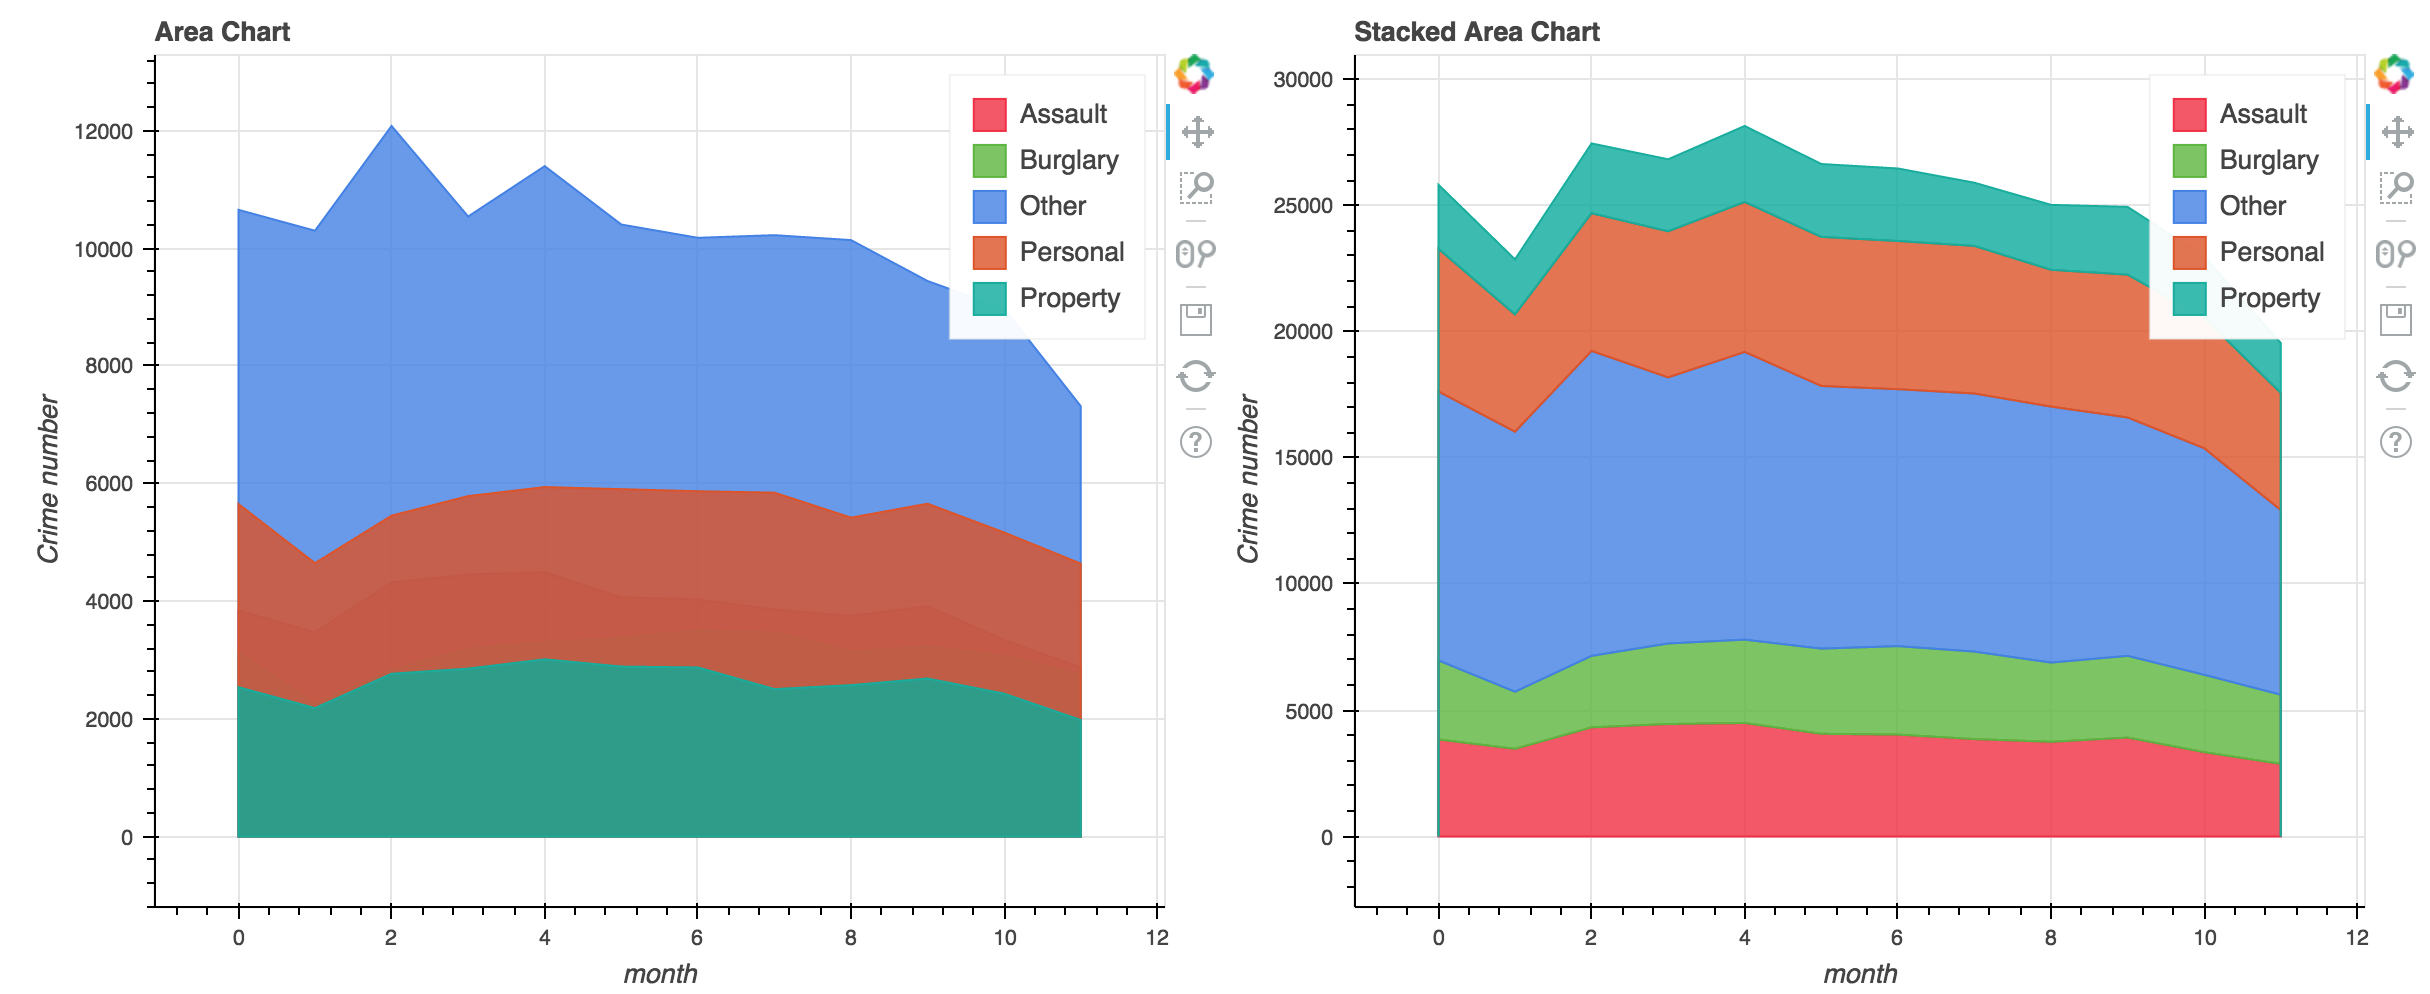

In [4]:
from IPython.display import Image
Image('Project3.png')

### Time 
We would like to find the relationship between offense time and type of crime in the most frequent offense time. So, we use subquery to analyze the 5 most frequent offense hour and their crime type as well as number of crimes. 

In [7]:
%%sql
SELECT hour_24, crime_dim.crime_type, count(*) as count
FROM time_dim, crimebr_fact, crime_dim
WHERE time_dim.time_id = crimebr_fact.time_id 
AND crime_dim.crime_id = crimebr_fact.crime_id
AND time_dim.hour_24 IN
    (SELECT time_dim.hour_24
     FROM time_dim, crimebr_fact, crime_dim
     WHERE time_dim.time_id = crimebr_fact.time_id AND crime_dim.crime_id = crimebr_fact.crime_id AND hour_24 != 'NA'
     GROUP BY hour_24
     ORDER BY count(*) DESC LIMIT 5)
GROUP BY crime_dim.crime_type,hour_24
ORDER BY count DESC;

25 rows affected.


[('00', 'Other', 9774),
 ('23', 'Other', 9087),
 ('22', 'Other', 8379),
 ('21', 'Other', 7767),
 ('20', 'Other', 6192),
 ('00', 'Personal', 3920),
 ('21', 'Assault', 3399),
 ('20', 'Assault', 3262),
 ('20', 'Personal', 3235),
 ('23', 'Assault', 3165),
 ('22', 'Assault', 2991),
 ('00', 'Assault', 2808),
 ('22', 'Personal', 2634),
 ('21', 'Personal', 2419),
 ('23', 'Personal', 2411),
 ('22', 'Burglary', 2333),
 ('20', 'Burglary', 1967),
 ('00', 'Burglary', 1828),
 ('22', 'Property', 1766),
 ('21', 'Burglary', 1750),
 ('21', 'Property', 1724),
 ('00', 'Property', 1649),
 ('20', 'Property', 1618),
 ('23', 'Burglary', 1590),
 ('23', 'Property', 1305)]

### From the the result we can see the most dangerous time period is from 8 PM to the midnight because all types of crime are at highest level. 

From the previous result, we could see that there are often crimes after 8pm, and the most frequent type is OTHER. Next, we would like to find days with most number of crimes by using aggregation function in sql. 

In [11]:
%%sql
SELECT day_of_week, count(*) as count
FROM time_dim, crimebr_fact, crime_dim
WHERE time_dim.time_id = crimebr_fact.time_id AND crime_dim.crime_id = crimebr_fact.crime_id
GROUP BY day_of_week
ORDER BY count DESC;

7 rows affected.


[(6, 47306),
 (7, 44571),
 (5, 44214),
 (3, 43318),
 (4, 41901),
 (2, 41183),
 (1, 40044)]

We found that in weekend and Friday, there tends to be more crimes. 

### Distribution of Crime's location
We are trying to find the district with most crimes in Baton Rouge.

In [48]:
%%sql
SELECT district_dim.district,count(*) AS count 
FROM district_dim,crimebr_fact,crime_dim
WHERE district_dim.district_id = crimebr_fact.district_id AND crime_dim.crime_id = crimebr_fact.crime_id AND district!='NA'
GROUP BY district_dim.district
ORDER BY district;

5 rows affected.


[('1', 84629), ('2', 85644), ('3', 52138), ('4', 55910), ('O', 546)]

In [50]:
import psycopg2
import pandas as pd
conn = psycopg2.connect("dbname='project03' user='dbuser' host='localhost'")
c = conn.cursor()

c.execute("SELECT district_dim.district,count(*) AS count FROM district_dim,crimebr_fact,crime_dim WHERE district_dim.district_id = crimebr_fact.district_id AND crime_dim.crime_id = crimebr_fact.crime_id AND district!='NA' GROUP BY district_dim.district ORDER BY district;")
rows = c.fetchall()

district = []
for r in rows:
    district.append(r[1]) 

df7 = pd.DataFrame(district,index=['1','2','3','4','0'])
df7.columns=['crime in district']
print(df7)

conn.commit()

   crime in district
1              84629
2              85644
3              52138
4              55910
0                546


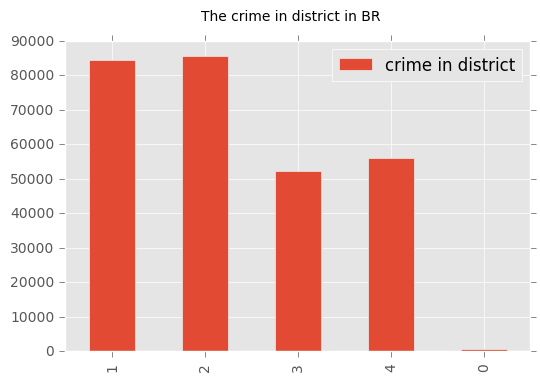

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

df7.plot(kind='bar')
plt.suptitle('The crime in district in BR')

#### we found that the district 2 has the highest crime number among those 5 districts, so we want to explore the district 2 crime type.

In [52]:
%%sql
select count(*), crime_type, district
from crimebr
WHERE district = '2'
group by crime_type, district
order by crime_type, district;

5 rows affected.


[(10100, 'Assault', '2'),
 (11041, 'Burglary', '2'),
 (41955, 'Other', '2'),
 (17756, 'Personal', '2'),
 (6597, 'Property', '2')]

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

labels=['Assault','Burglary','Other','Personal', 'Property']
values=[10100,11041,41955,17756,6597]

trace=go.Pie(labels=labels,values=values)

py.iplot([trace])

#### You may not be able to run this code in datanotebook to see the diagram, but on the local juoyter notebook it will be fine. Therefore we attach the diagram below.

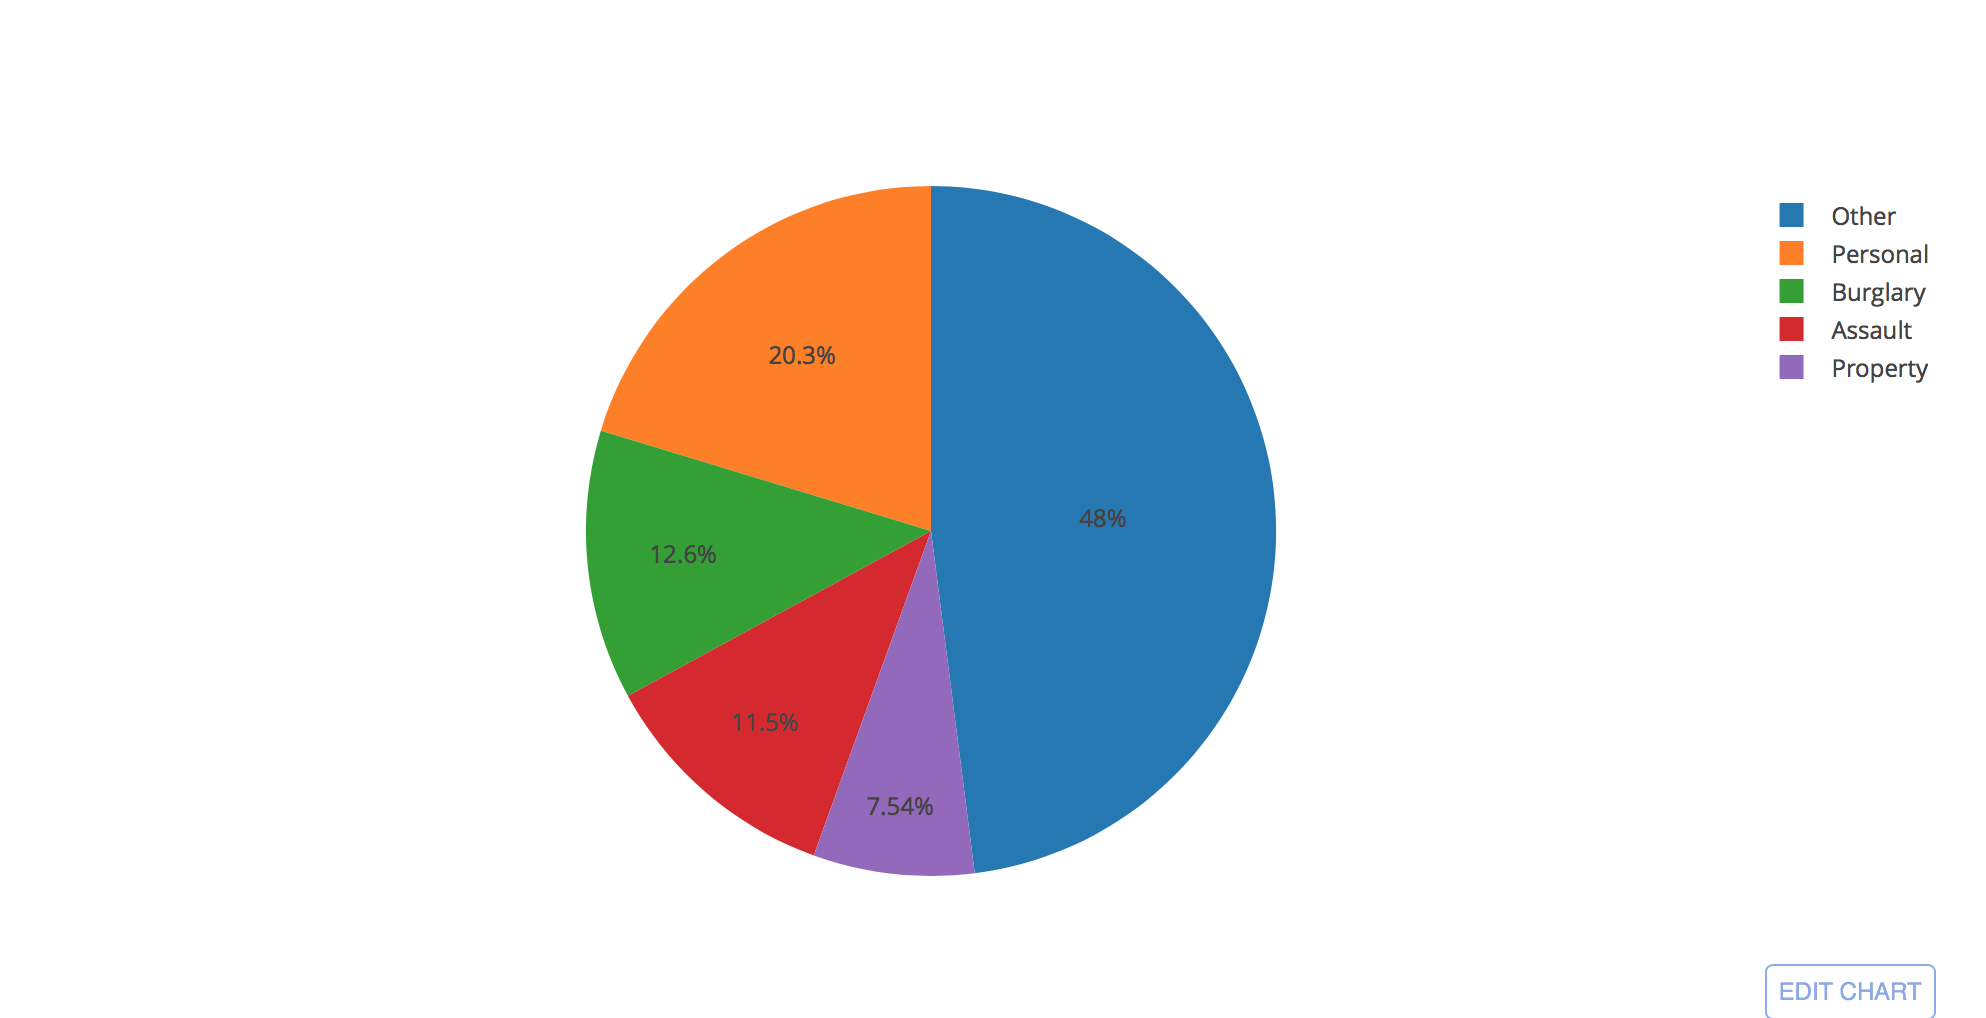

In [1]:
from IPython.display import Image
Image('pie.png')

Then we are trying to find number of crimes in different subzones in district 2.

In [13]:
%%sql
SELECT district_dim.complete_district, count(*) AS count
FROM district_dim,crimebr_fact,crime_dim
WHERE district_dim.district_id = crimebr_fact.district_id AND crime_dim.crime_id = crimebr_fact.crime_id 
AND district_dim.zone IN
    (SELECT district_dim.zone
     FROM district_dim,crimebr_fact,crime_dim
     WHERE district_dim.district_id = crimebr_fact.district_id AND crime_dim.crime_id = crimebr_fact.crime_id AND district_dim.district = '2'
     GROUP BY district_dim.zone
     ORDER BY count(*) DESC LIMIT 2)
AND district_dim.district='2'
GROUP BY complete_district
ORDER BY count DESC;

8 rows affected.


[('2C3', 11955),
 ('2C1', 6788),
 ('2B1', 6221),
 ('2B2', 6050),
 ('2B3', 5205),
 ('2C2', 4318),
 ('2B4', 2016),
 ('2B5', 587)]

In [2]:
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
py.sign_in('muffin12','9YuiSSWyBzXLWgtinreB')

df = pd.read_csv('crime.csv')
for col in df.columns:
    df[col] = df[col].astype(str)

data = Data([
    Scattermapbox(
        hoverinfo='text',
            lat=df['Latitude'],
            lon=df['Longitude'],
            marker=Marker(
            colorscale=[[1, 'rgb(150,0,90)'], [158.0, 'rgb(0, 25, 255)'], [316.0, 'rgb(44, 255, 150)'], [474.0, 'rgb(255, 234, 0)'], [632, 'rgb(255, 0, 0)']],
            opacity=0.6,
            reversescale=True,
            size=5
        ),
        mode='markers',
        name='Finished',
        showlegend=True,
        text=df['GEOLOCATION1']
     )   
])
layout = Layout(
    autosize=False,
    height=300,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoiY2Nvb2s4MTciLCJhIjoiY2l1c2ZxMnE5MDA5MjJubnkxN3NiYmFuZSJ9.wVJz74V_bV0h072V0EHOug',
        bearing=0,
        center=dict(
            lat=30.476263,
            lon=-91.006251
        ),
        pitch=0,
        style='light',
        zoom=9
    ),
    margin = dict(
        l=0,
        r=12.5,
        b=25,
        t=25,
        pad=4),
    title='Crime distribution in BR ',
    titlefont=dict(
        color='#262626',
        size=14.0
    ),
    width=500
)
fig = Figure(data=data, layout=layout)
py.iplot(fig,filename = 'crime distribution')

/home/zzq/anaconda3/lib/python3.5/site-packages/plotly/plotly/plotly.py:236: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



#### You may not be able to run this code in datanotebook to see the diagram, but on the local juoyter notebook it will be fine. Therefore we attach the diagram below.

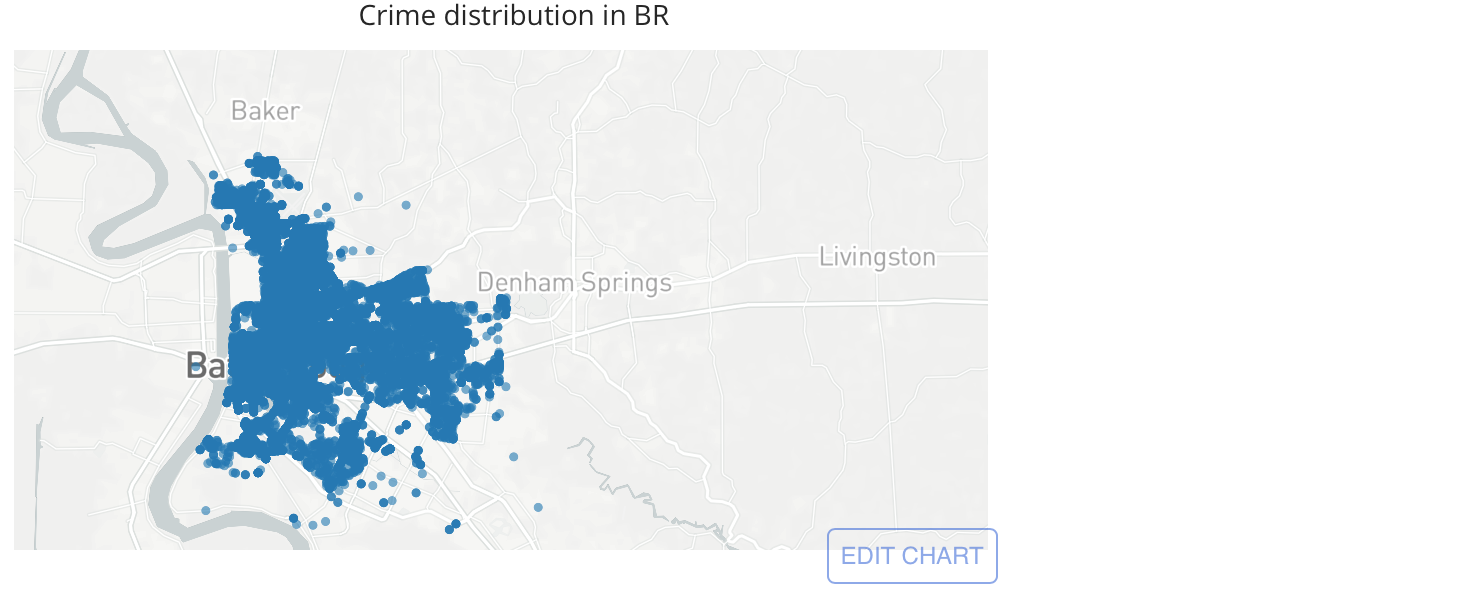

In [2]:
from IPython.display import Image
Image('map.png')

### BONUS
We choose another data set of business registered in Baton Rouge in order to analyze the relationship between the number of business and the number of crime in a certain area in Baton Rouge. 

In [16]:
!wget https://raw.githubusercontent.com/JefferyBA/istm-6212/master/Businesses_Registered_with_EBR_Parish.csv

--2016-12-09 14:39:25--  https://raw.githubusercontent.com/JefferyBA/istm-6212/master/Businesses_Registered_with_EBR_Parish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2765232 (2.6M) [text/plain]
Saving to: ‘Businesses_Registered_with_EBR_Parish.csv’

Businesses_Register 100%[=====================>]   2.64M  --.-KB/s   in 0.05s  

2016-12-09 14:39:26 (56.4 MB/s) - ‘Businesses_Registered_with_EBR_Parish.csv’ saved [2765232/2765232]



In [17]:
!mv Businesses_Registered_with_EBR_Parish.csv buz.csv

In [18]:
!wc -l buz.csv

43478 buz.csv


In [19]:
%%sql
DROP TABLE IF EXISTS buz;
CREATE TABLE buz
(
 name VARCHAR(255),
 account_code INT,
 account_type  TEXT,
 state TEXT,
 zipcode VARCHAR(80)
    
);

Done.
Done.


[]

In [20]:
%%sql
COPY buz FROM '/home/jovyan/work/buz.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

43477 rows affected.


[]

In [21]:
%%sql
SELECT * FROM buz
LIMIT 10;

10 rows affected.


[('CENTRAL AMERICAN LIFE', 6000, 'Insurance Company', 'LA', '71291'),
 ('GULFCO LIFE', 6000, 'Insurance Company', 'LA', '71351'),
 ('LOUISIANA FARM BUREAU CAS INS', 6000, 'Insurance Company', 'LA', '70895'),
 ('LOUISIANA FARM BUREAU MUTUAL', 6000, 'Insurance Company', 'LA', '70895'),
 ('NATIONAL UNION FIRE INS OF PITT PA', 6000, 'Insurance Company', 'LA', '70816'),
 ('PAN AMERICAN LIFE', 6000, 'Insurance Company', 'LA', '70130'),
 ('RABENHORST LIFE INS COM', 6000, 'Insurance Company', 'LA', '70802'),
 ('RHODES LIFE INS CO OF LA', 6000, 'Insurance Company', 'LA', '70805'),
 ('E C BODYWORKS LLC', 1520, 'Service/Rental/Etc', 'LA', '70809'),
 ('WILBERT LIFE INS', 6000, 'Insurance Company', 'LA', '70764')]

In [22]:
%%sql
DROP TABLE IF EXISTS buzcrime;
CREATE TABLE buzcrime
(
 buz_num INTEGER,
 zipcode VARCHAR(80),
 crime_num INTEGER
    
);

Done.
Done.


[]

In [23]:
%%sql
INSERT INTO buzcrime (zipcode, crime_num)
(SELECT zip, count(*) AS count 
FROM crimebr WHERE zip != 'NA'
GROUP BY zip ORDER BY count DESC
LIMIT 10);

10 rows affected.


[]

In [24]:
%%sql
UPDATE buzcrime a
SET    buz_num = b.count
FROM (SELECT buzcrime.zipcode, count(*) AS count FROM buz INNER JOIN buzcrime on buz.zipcode = buzcrime.zipcode GROUP BY buzcrime.zipcode) b
WHERE  a.zipcode = b.zipcode


10 rows affected.


[]

In [25]:
%%sql
SELECT * FROM buzcrime;

10 rows affected.


[(2447, '70805', 43381),
 (2567, '70802', 33143),
 (3219, '70815', 16668),
 (942, '70807', 14386),
 (4245, '70806', 13693),
 (4525, '70816', 13300),
 (2917, '70808', 12735),
 (513, '70820', 5875),
 (816, '70811', 3089),
 (1463, '70814', 2784)]

In [26]:
import psycopg2
import pandas as pd
conn = psycopg2.connect("dbname='project03' user='dbuser' host='localhost'")
c = conn.cursor()

c.execute("SELECT * FROM buzcrime ORDER BY crime_num DESC LIMIT 20;")
rows = c.fetchall()

buzcrime = []
for r in rows:
    buzcrime.append(r) 

df8 = pd.DataFrame(buzcrime)
df8.columns=['number of business', 'zipcode', 'number of crimes']
print(df8)

conn.commit()

   number of business zipcode  number of crimes
0                2447   70805             43381
1                2567   70802             33143
2                3219   70815             16668
3                 942   70807             14386
4                4245   70806             13693
5                4525   70816             13300
6                2917   70808             12735
7                 513   70820              5875
8                 816   70811              3089
9                1463   70814              2784


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


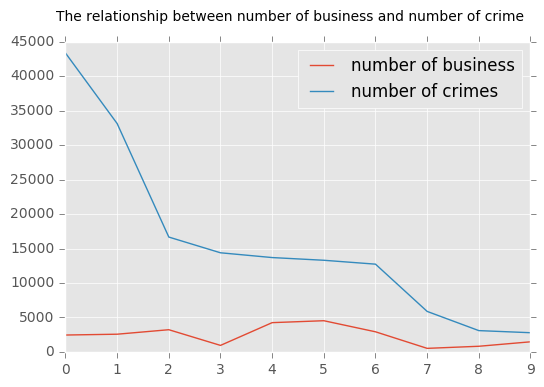

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

df8.plot()
plt.suptitle('The relationship between number of business and number of crime')

From the plot, we could not clearly see the relationship between the number of crime and number of business. So we decided to build a regression. 

In [10]:
import pandas as pd
import numpy as np

data = dict(
    cri_num =[43381,33143,16668,14386,13693,13300,12735,5875,3089,2784],
    buz_num =[2447,2567,3219,942,4245,4525,2917,513,816,1463])
df9 = pd.DataFrame.from_dict(data)

In [50]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

In [51]:
result = sm.ols(formula="buz_num~ cri_num", data=df9).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                buz_num   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.7171
Date:                Fri, 09 Dec 2016   Prob (F-statistic):              0.422
Time:                        07:36:13   Log-Likelihood:                -85.763
No. Observations:                  10   AIC:                             175.5
Df Residuals:                       8   BIC:                             176.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1868.6467    741.650      2.520      0.0

/home/zzq/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



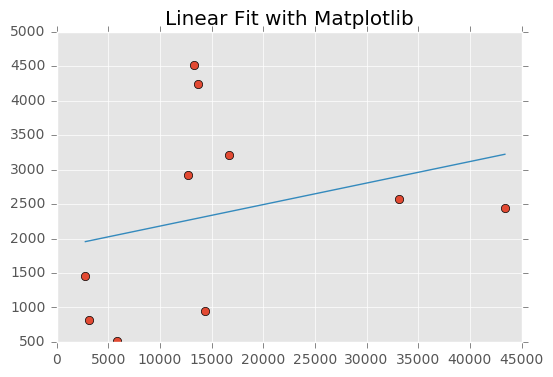

In [53]:
# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

X=df9['cri_num']
Y=df9['buz_num']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
line = slope*X+intercept

plt.plot(X,Y,'o', X, line)
pylab.title('Linear Fit with Matplotlib')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.show()

From the regression line and the summary of results, we found that the R-square was too small and the pvalue was greater than 0.05. So, we could not be certain that there is a relationshp between number of crime and number of business. 